1~5번 문제

In [1]:
install.packages(c("tidyverse", "caret", "e1071", "Hmisc"))
library(tidyverse)
library(data.table)

library(repr)
options(repr.plot.width=10, repr.plot.height=7)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#https://drive.google.com/file/d/14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l/view?usp=share_link

system("gdown --id 14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l")
system("ls", TRUE)

[1] "sample_data"       "titanic_train.csv"

In [3]:
DF <- fread("/content/titanic_train.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

In [4]:
DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

In [5]:
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0  8.05 S       
 6 0        3      male      NA     0     0  8.46 Q       
 7 0        1      male      54     0     0 51.9  S       
 8 0        3      male       2     3     1 21.1  S       
 9 1        3      female    27     0     2 11.1  S       
10 1        2      female    14     1     0 30.1  C       
# ℹ 881 more rows


In [6]:
summary(DF)

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [7]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [8]:
#DF <- DF %>% na.omit()
DF$Age <- impute(DF$Age, median)
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


In [9]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [10]:
set.seed(31)
index <- caret::createDataPartition(y = DF$Survived, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1        2      male   34.0         0     0 13    S       
 2 0        3

6. train 데이터를 이용하여 SVM 모델 svm_basic을 생성하고, svm_basic을 사용한 분류 결과를
확인하세요. 또한 confusionMatrix()를 생성하여 분류 결과가 같은지 확인하고 정확도 및 성능
지표를 확인하세요. (Hint) e1071::svm(), summary(), predict(), table(),
caret::confusionMatrix()

In [11]:
library(e1071)


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute




In [12]:
svm_basic <- svm(Survived~., data = train, type = "C-classification", kernel = "radial")

In [13]:
summary(svm_basic)


Call:
svm(formula = Survived ~ ., data = train, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  375

 ( 189 186 )


Number of Classes:  2 

Levels: 
 0 1




In [14]:
print("svm_basic : train 데이터 분류 결과")
table(predict(svm_basic, train), train$Survived)

print("svm_basic : train 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_basic, train), train$Survived)
cm

[1] "svm_basic : train 데이터 분류 결과"


   
      0   1
  0 445  79
  1  50 229

[1] "svm_basic : train 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 445  79
         1  50 229
                                          
               Accuracy : 0.8394          
                 95% CI : (0.8121, 0.8641)
    No Information Rate : 0.6164          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6541          
                                          
 Mcnemar's Test P-Value : 0.01369         
                                          
            Sensitivity : 0.8990          
            Specificity : 0.7435          
         Pos Pred Value : 0.8492          
         Neg Pred Value : 0.8208          
             Prevalence : 0.6164          
         Detection Rate : 0.5542          
   Detection Prevalence : 0.6526          
      Balanced Accuracy : 0.8212          
                                          
       'Positive' Class : 0               
                              

7. test 데이터와 모델 svm_basic를 이용하여 예측을 수행한 후 예측값과 test$Survived 사이의
confusionMatrix를 생성하여 분류 결과와 정확도 및 성능지표를 확인하세요. (Hint) predict(),
caret::confusionMatrix()

In [15]:
print("svm_basic : test 데이터 분류 결과")
table(predict(svm_basic, test), test$Survived)

print("svm_basic : test 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_basic, test), test$Survived)
cm
#draw_confusion_matrix(cm)

[1] "svm_basic : test 데이터 분류 결과"


   
     0  1
  0 46 13
  1  8 21

[1] "svm_basic : test 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 46 13
         1  8 21
                                          
               Accuracy : 0.7614          
                 95% CI : (0.6586, 0.8458)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.002443        
                                          
                  Kappa : 0.4826          
                                          
 Mcnemar's Test P-Value : 0.382733        
                                          
            Sensitivity : 0.8519          
            Specificity : 0.6176          
         Pos Pred Value : 0.7797          
         Neg Pred Value : 0.7241          
             Prevalence : 0.6136          
         Detection Rate : 0.5227          
   Detection Prevalence : 0.6705          
      Balanced Accuracy : 0.7347          
                                          
       'Positive' Class : 0               
                                    

8. train 데이터를 이용하여 gamma는 1e-08 ~ 10, cost는 1 ~ 30 범위로 총 10*30 = 300개의 조합
으로 튜닝하여 최적의 hyperparameters를 찾아 best_param에 저장하세요. (Hint)
tune.svm(), summary(튜닝결과)$best.parameters

In [16]:
tuned <- e1071::tune.svm(Survived~., data=train, gamma=10^(-8:1), cost=1:30)

summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    2

- best performance: 0.1669136 

- Detailed performance results:
    gamma cost     error dispersion
1   1e-08    1 0.3835957 0.05735101
2   1e-07    1 0.3835957 0.05735101
3   1e-06    1 0.3835957 0.05735101
4   1e-05    1 0.3835957 0.05735101
5   1e-04    1 0.3835957 0.05735101
6   1e-03    1 0.3686728 0.05550443
7   1e-02    1 0.2004784 0.03425443
8   1e-01    1 0.1681790 0.04660476
9   1e+00    1 0.1856019 0.04481826
10  1e+01    1 0.2540741 0.03092092
11  1e-08    2 0.3835957 0.05735101
12  1e-07    2 0.3835957 0.05735101
13  1e-06    2 0.3835957 0.05735101
14  1e-05    2 0.3835957 0.05735101
15  1e-04    2 0.3835957 0.05735101
16  1e-03    2 0.3101543 0.05814468
17  1e-02    2 0.1967438 0.03541385
18  1e-01    2 0.1669136 0.04752419
19  1e+00    2 0.1930556 0.04348756
20  1e+01    2 0.2603241 0.03959699
21  1e-08    3 0.3835957 0.05735101
22  1e-07    3 0.3835957 

In [17]:
best_param <- summary(tuned)$best.parameters
best_param #best_param[1,1] == gamma / best_param[1:2] == cost

,gamma,cost
,<dbl>,<int>
18,0.1,2


9. train 데이터를 이용하여 위 문제의 best_param을 적용한 SVM 모델 svm_best을 생성하고, svm_best을 사용한 분류 결과를 확인하세요. 또한 confusionMatrix()를 생성하여 분류 결과가
같은지 확인하고 정확도 및 성능지표를 확인하세요. (Hint) e1071::svm(), summary(),
predict(), table(), caret::confusionMatrix()

In [19]:
svm_best <- e1071::svm(Survived~., data = train, type = "C-classification", kernel = "radial", gamma = best_param[1,1], cost = best_param[1,2])

summary(svm_best)


Call:
svm(formula = Survived ~ ., data = train, type = "C-classification", 
    kernel = "radial", gamma = best_param[1, 1], cost = best_param[1, 
        2])


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  2 

Number of Support Vectors:  360

 ( 184 176 )


Number of Classes:  2 

Levels: 
 0 1




In [20]:
print("svm_best : train 데이터 분류 결과")
table(predict(svm_best, train), train$Survived)

print("svm_best : train 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_best, train), train$Survived)
cm

[1] "svm_best : train 데이터 분류 결과"


   
      0   1
  0 450  81
  1  45 227

[1] "svm_best : train 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 450  81
         1  45 227
                                          
               Accuracy : 0.8431          
                 95% CI : (0.8161, 0.8676)
    No Information Rate : 0.6164          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6607          
                                          
 Mcnemar's Test P-Value : 0.001821        
                                          
            Sensitivity : 0.9091          
            Specificity : 0.7370          
         Pos Pred Value : 0.8475          
         Neg Pred Value : 0.8346          
             Prevalence : 0.6164          
         Detection Rate : 0.5604          
   Detection Prevalence : 0.6613          
      Balanced Accuracy : 0.8231          
                                          
       'Positive' Class : 0               
                              

10. test 데이터와 모델 svm_best를 이용하여 예측을 수행한 후 예측값과 test$Survived 사이의
confusionMatrix를 생성하여 분류 결과와 정확도 및 성능지표를 확인하세요. (Hint)
predict(), caret::confusionMatrix()

In [21]:
print("svm_best : test 데이터 분류 결과")
table(predict(svm_best, test), test$Survived)

print("svm_best : test 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_best, test), test$Survived)
cm

[1] "svm_best : test 데이터 분류 결과"


   
     0  1
  0 48 14
  1  6 20

[1] "svm_best : test 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48 14
         1  6 20
                                          
               Accuracy : 0.7727          
                 95% CI : (0.6711, 0.8553)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.00114         
                                          
                  Kappa : 0.4989          
                                          
 Mcnemar's Test P-Value : 0.11752         
                                          
            Sensitivity : 0.8889          
            Specificity : 0.5882          
         Pos Pred Value : 0.7742          
         Neg Pred Value : 0.7692          
             Prevalence : 0.6136          
         Detection Rate : 0.5455          
   Detection Prevalence : 0.7045          
      Balanced Accuracy : 0.7386          
                                          
       'Positive' Class : 0               
                                    

11. 모델 svm_basic과 모델 svm_best를 사용하여 test 데이터로 예측을 수행한 결과를
confusionMatrix()로 비교하세요. (Hint) caret::confusionMatrix()

In [22]:
print("svm_basic : train 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_basic, train), train$Survived)
cm

print("svm_best : train 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_best, train), train$Survived)
cm

[1] "svm_basic : train 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 445  79
         1  50 229
                                          
               Accuracy : 0.8394          
                 95% CI : (0.8121, 0.8641)
    No Information Rate : 0.6164          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.6541          
                                          
 Mcnemar's Test P-Value : 0.01369         
                                          
            Sensitivity : 0.8990          
            Specificity : 0.7435          
         Pos Pred Value : 0.8492          
         Neg Pred Value : 0.8208          
             Prevalence : 0.6164          
         Detection Rate : 0.5542          
   Detection Prevalence : 0.6526          
      Balanced Accuracy : 0.8212          
                                          
       'Positive' Class : 0               
                              

[1] "svm_best : train 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 450  81
         1  45 227
                                          
               Accuracy : 0.8431          
                 95% CI : (0.8161, 0.8676)
    No Information Rate : 0.6164          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6607          
                                          
 Mcnemar's Test P-Value : 0.001821        
                                          
            Sensitivity : 0.9091          
            Specificity : 0.7370          
         Pos Pred Value : 0.8475          
         Neg Pred Value : 0.8346          
             Prevalence : 0.6164          
         Detection Rate : 0.5604          
   Detection Prevalence : 0.6613          
      Balanced Accuracy : 0.8231          
                                          
       'Positive' Class : 0               
                              

12. caret::train() 함수에 train 데이터와 best_param을 적용하여 SVM 모델 svm_train을 생성하
세요. 이후 모델 svm_train과 모델 svm_best를 사용하여 test 데이터로 예측을 수행한 결과
를 confusionMatrix()로 비교하세요.

In [23]:
install.packages("kernlab")
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




In [25]:
svm_train = caret::train(Survived~., data=train, method='svmRadial', gamma = best_param[1,1], cost = best_param[1,2])

print("cm_svm_train : predict test data")
cm_svm_train <- caret::confusionMatrix(predict(svm_train, test), test$Survived)
cm_svm_train

print("svm_best : test 데이터 confusionMaxtrix 결과")
cm <- caret::confusionMatrix(predict(svm_best, test), test$Survived)
cm

[1] "cm_svm_train : predict test data"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50 15
         1  4 19
                                          
               Accuracy : 0.7841          
                 95% CI : (0.6835, 0.8647)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.000501        
                                          
                  Kappa : 0.5156          
                                          
 Mcnemar's Test P-Value : 0.021781        
                                          
            Sensitivity : 0.9259          
            Specificity : 0.5588          
         Pos Pred Value : 0.7692          
         Neg Pred Value : 0.8261          
             Prevalence : 0.6136          
         Detection Rate : 0.5682          
   Detection Prevalence : 0.7386          
      Balanced Accuracy : 0.7424          
                                          
       'Positive' Class : 0               
                                    

[1] "svm_best : test 데이터 confusionMaxtrix 결과"


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48 14
         1  6 20
                                          
               Accuracy : 0.7727          
                 95% CI : (0.6711, 0.8553)
    No Information Rate : 0.6136          
    P-Value [Acc > NIR] : 0.00114         
                                          
                  Kappa : 0.4989          
                                          
 Mcnemar's Test P-Value : 0.11752         
                                          
            Sensitivity : 0.8889          
            Specificity : 0.5882          
         Pos Pred Value : 0.7742          
         Neg Pred Value : 0.7692          
             Prevalence : 0.6136          
         Detection Rate : 0.5455          
   Detection Prevalence : 0.7045          
      Balanced Accuracy : 0.7386          
                                          
       'Positive' Class : 0               
                                    

13. caret 라이브러리의 train() 함수가 제공하는 모든 모델을 확인하세요

In [26]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "pre"                
[160] "PRIM"                "protoclass"          "qda"                
[163] "QdaCov"              "qrf"                 "qrnn"               
[166] "randomGLM"           "ranger"      

14. caret::train() 함수를 이용하여 randomForest 모델 model_rf를 생성 한 후 모델 model_rf에
서 사용된 변수의 중요도를 출력하고 시각화하세요.

In [27]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [28]:
#훈련에 대한 설정
#control = trainControl(method='repeatdcv', number=10,repeats=2)

model_rf = train(Survived~., data=train, method='rf')
#trControl = control, verbose = FALSE, metric = 'Accuracy'
#print(model_rf)

#변수 중요도 측정
importance <- varImp(model_rf, scale=FALSE)
print(importance)

rf variable importance

          Overall
Sexmale    79.669
Fare       42.276
Age        27.622
Pclass3    23.034
SibSp      11.501
Parch       9.449
EmbarkedS   4.688
Pclass2     4.614
EmbarkedC   4.521
EmbarkedQ   2.737


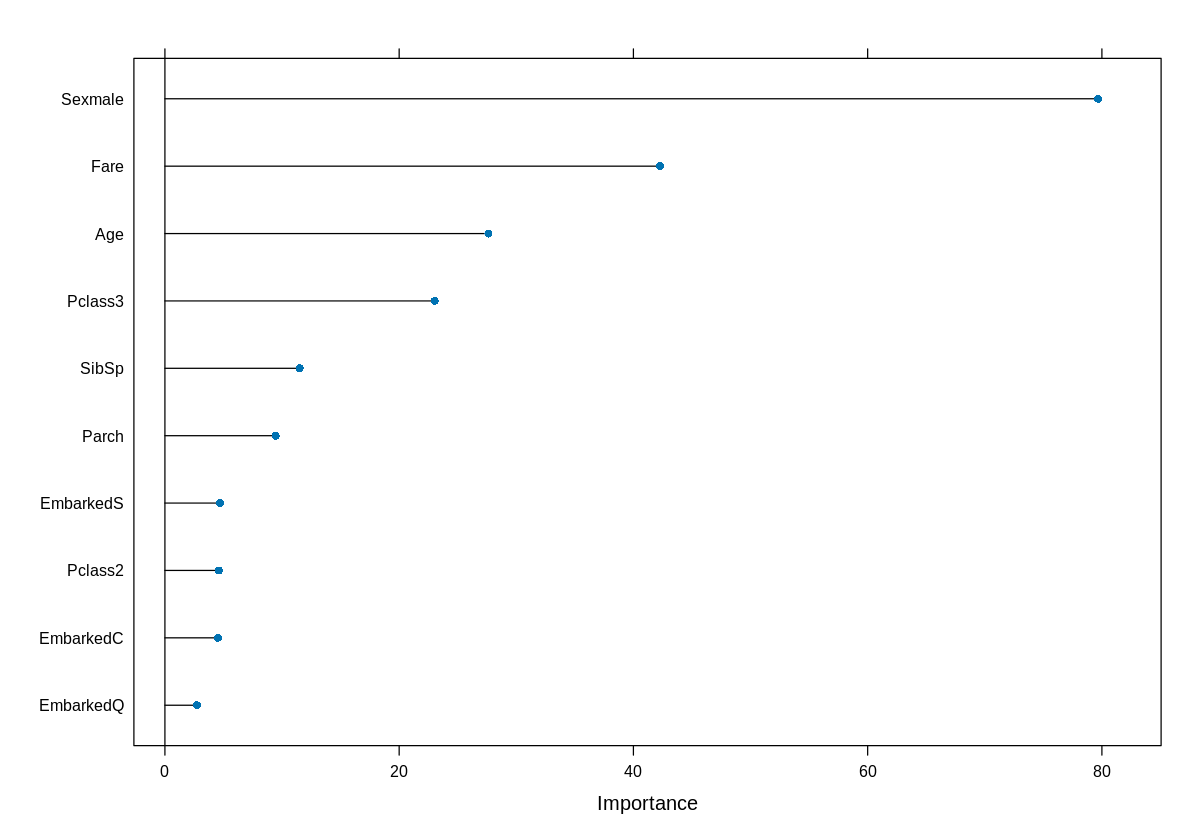

In [29]:
plot(importance)